# Importancia de la permutación

## Introducción

Imagina un mundo donde tus datos estén limpios, la gente confíe ciegamente en tu trabajo y ya seas un experto en el problema en el que estás trabajando.

¡Ahora sal de ahí! Eso no es realidad.

Los datos están sucios. Los modelos hacen cosas raras. Necesitas una forma de ver cuándo sucede esto. La importancia de la permutación puede ayudarte a ver cuándo tu modelo produce resultados contraintuitivos. La gente no confía ciegamente en tu modelo. La importancia de la permutación es una forma clara de ayudarles a verificar que estás haciendo algo sensato.

A veces careces de dominio sobre el problema que estás intentando resolver. La importancia de la permutación te ayuda a ponerte al día rápidamente, distinguiendo qué características son las más importantes.

Una de las preguntas más básicas que podríamos plantearnos sobre un modelo es: *¿Qué características tienen el mayor impacto en las predicciones?*

Este concepto se llama **importancia de la característica** (*feature importance*). He visto que la importancia de las funciones se ha utilizado efectivamente muchas veces para cada propósito en la lista de casos de uso.

Hay múltiples formas de medir la importancia de las características. Algunos otros enfoques responden sutilmente a diferentes versiones de la pregunta anterior.

Esta lección se centra en la *importancia de la permutación*. En comparación con la mayoría de los otros enfoques, la importancia de la permutación es:

+ Rápida de calcular

+ Ampliamente usada y entendida

+ Consistente con propiedades de las que quisiéramos tener una medida de la importancia de la característica

## ¿Cómo funciona?

La importancia de la permutación usa modelos diferentes a cualquier cosa que hayas visto hasta ahora y muchas personas lo encuentran confuso al principio. Así que vamos a empezar con un ejemplo para hacerlo más concreto.

Consideremos los datos con el siguiente formato:

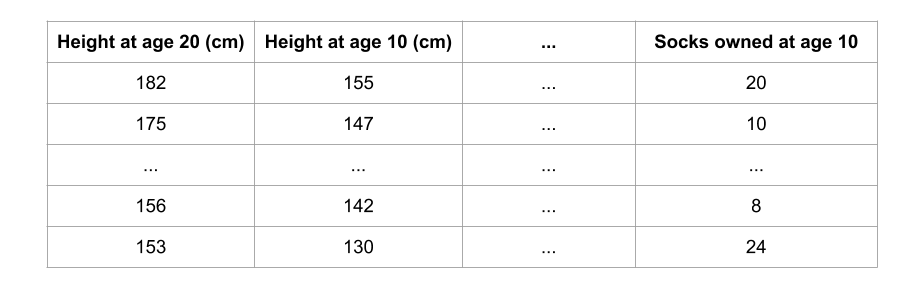

In [1]:
from IPython.display import Image
Image(filename="./images/permut_01.png")

Queremos predecir la estatura de una persona cuando tengan 20 años, utilizando datos disponibles a la edad de 10 años.

Nuestros datos incluyen características útiles (altura a la edad de 10 años), características con poco poder predictivo (calcetines de propiedad), así como algunas otras características en las que no nos centraremos en esta explicación.

**La importancia de la permutación se calcula una vez que se ha entrenado un modelo**. Por lo tanto, no cambiaremos el modelo ni cambiaremos las predicciones que obtendríamos para un valor dado de altura, número de calcetines, etc.

En lugar de eso, haremos la siguiente pregunta: Si mezclo aleatoriamente una sola columna de los datos de validación, dejando el objetivo y todas las demás columnas en su lugar, ¿cómo afectaría eso a la precisión de las predicciones en los datos ahora mezclados?

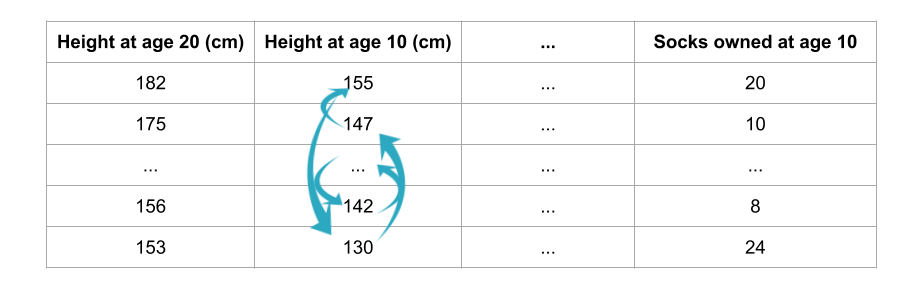

In [2]:
Image(filename="./images/permut_02.png")

Reordenar aleatoriamente una sola columna debería causar predicciones menos precisas, ya que los datos resultantes ya no corresponden a nada observado en el mundo real. La precisión del modelo sufre especialmente si se baraja una columna en la que el modelo se basó en gran medida para las predicciones. En este caso, barajar `altura a los 10 años` causaría predicciones terribles. Si barajamos los calcetines que poseemos, las predicciones resultantes no sufrirían tanto.

Con este insight el proceso es el siguiente:

1. Consigue un modelo entrenado.
2. Baraja los valores en una sola columna, haz predicciones utilizando el conjunto de datos resultante. Utiliza estas predicciones y los verdaderos valores objetivo para calcular cuánto sufrió la función de pérdida al barajar. Ese deterioro del rendimiento mide la importancia de la variable que acabas de barajar.
3. Devuelve los datos al orden original (es decir, deshaz el orden aleatorio del paso 2.) Ahora repite el paso 2 con la siguiente columna en el conjunto de datos, así hasta que hayas calculado la importancia de cada columna.

## Código de ejemplo

Nuestro ejemplo usará un modelo que predice si un equipo de fútbol tendrá el ganador del "Hombre del año" en base a las estadísticas del equipo. El premio "El hombre del año" se otorga al mejor jugador del juego. La construcción de modelos no es nuestro foco actual, por lo que la celda de abajo carga los datos y crea un modelo rudimentario.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('./data/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [5]:
# Creamos los dataframes objetivo y de características
y = (data['Man of the Match'] == "Yes")  # convierte la cadena "Yes"/"No" a binario
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

In [6]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

A continuación, se muestra cómo calcular y mostrar la importancia con la biblioteca **eli5**:

In [7]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1159,Goal Scored
0.0625 ± 0.0791,Corners
0.0437 ± 0.0500,Distance Covered (Kms)
0.0375 ± 0.0729,On-Target
0.0375 ± 0.0468,Free Kicks
0.0187 ± 0.0306,Blocked
0.0125 ± 0.0750,Pass Accuracy %
0.0125 ± 0.0500,Yellow Card
0.0063 ± 0.0468,Saves
0.0063 ± 0.0250,Offsides


## Interpretando la Importancia de las Permutaciones

Los valores hacia la parte superior son las características más importantes y aquellos hacia la parte inferior son los menos importantes.

El primer número en cada fila muestra cuánto disminuyó el rendimiento del modelo con una mezcla aleatoria (en este caso, usando "precisión" como la métrica de rendimiento).

Como la mayoría de las cosas en la ciencia de los datos, hay un cierto grado de aleatoriedad en el cambio de rendimiento exacto de una columna mezclada. Medimos la cantidad de aleatoriedad en nuestro cálculo de la importancia de la permutación repitiendo el proceso con varias combinaciones aleatorias. El número después de ± mide cómo varía el rendimiento de una mezcla a la siguiente.

Ocasionalmente verás valores negativos para las permutaciones. En esos casos, las predicciones sobre los datos barajados (o ruidosos) resultaron ser más precisas que los datos reales. Esto sucede cuando la característica no importaba (debería haber tenido una importancia cercana a 0), pero la aleatoriedad hizo que las predicciones sobre los datos barajados fueran más precisas. Esto es más común con conjuntos de datos pequeños, como el de este ejemplo, porque hay más espacio para la suerte / oportunidad.

En nuestro ejemplo, la característica más importante fue los **goles marcados**. Eso parece sensato. Los amantes del fútbol pueden tener alguna intuición sobre si el orden de las otras variables son sorprendentes o no.